In [2]:
import mne
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fname = 'Data/eNTERFACE06_EMOBRAIN/Part1_IAPS_SES1_EEG_fNIRS_03082006.bdf'
raw = mne.io.read_raw_bdf(fname, preload=True)

Extracting EDF parameters from e:\QUY\Research\EEG\Data\eNTERFACE06_EMOBRAIN\Part1_IAPS_SES1_EEG_fNIRS_03082006.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 339199  =      0.000 ...  1324.996 secs...


In [4]:
raw.info

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, AF7, AF3, F1, F3, F5, F7, FT7, FC5, FC3, FC1, C1, C3, C5, ...
 chs: 72 EEG, 1 Stimulus
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 67.0 Hz
 meas_date: 2006-08-03 19:12:34 UTC
 nchan: 73
 projs: []
 sfreq: 256.0 Hz
 subject_info: 1 item (dict)
>

In [5]:
n_raw = raw.copy().notch_filter(50).filter(0.5 ,50)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1691 samples (6.605 s)


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1691 samples (6.605 s)



[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.6s


In [6]:
n_psd = n_raw.compute_psd()
psd = raw.compute_psd()
n_raw.info.ch_names

Effective window size : 8.000 (s)
Effective window size : 8.000 (s)


['Fp1',
 'AF7',
 'AF3',
 'F1',
 'F3',
 'F5',
 'F7',
 'FT7',
 'FC5',
 'FC3',
 'FC1',
 'C1',
 'C3',
 'C5',
 'T7',
 'TP7',
 'CP5',
 'CP3',
 'CP1',
 'P1',
 'P3',
 'P5',
 'P7',
 'P9',
 'PO7',
 'PO3',
 'O1',
 'Iz',
 'Oz',
 'POz',
 'Pz',
 'CPz',
 'Fpz',
 'Fp2',
 'AF8',
 'AF4',
 'AFz',
 'Fz',
 'F2',
 'F4',
 'F6',
 'F8',
 'FT8',
 'FC6',
 'FC4',
 'FC2',
 'FCz',
 'Cz',
 'C2',
 'C4',
 'C6',
 'T8',
 'TP8',
 'CP6',
 'CP4',
 'CP2',
 'P2',
 'P4',
 'P6',
 'P8',
 'P10',
 'PO8',
 'PO4',
 'O2',
 'EXG1',
 'EXG2',
 'EXG3',
 'EXG4',
 'EXG5',
 'EXG6',
 'EXG7',
 'EXG8',
 'Status']

Need more than one channel to make topography for eeg. Disabling interactivity.


C:\Users\admin\AppData\Local\Temp\ipykernel_1596\1057611499.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  psd.plot(picks = ['FC3'])
d:\admin\anaconda3\envs\mne\Lib\site-packages\mne\viz\utils.py:161: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


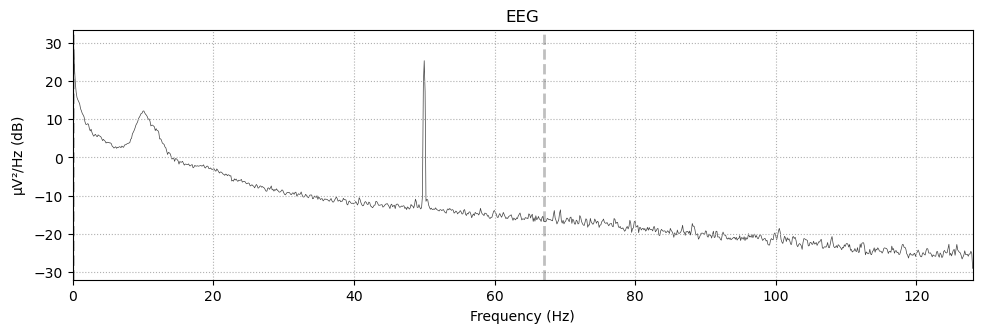

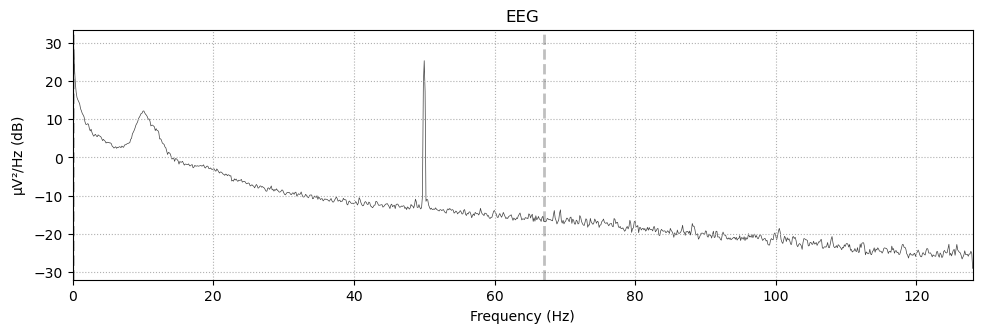

In [7]:
psd.plot(picks = ['FC3'])

Need more than one channel to make topography for eeg. Disabling interactivity.


C:\Users\admin\AppData\Local\Temp\ipykernel_1596\4199002171.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  n_psd.plot(picks = ['FC3'])
d:\admin\anaconda3\envs\mne\Lib\site-packages\mne\viz\utils.py:161: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


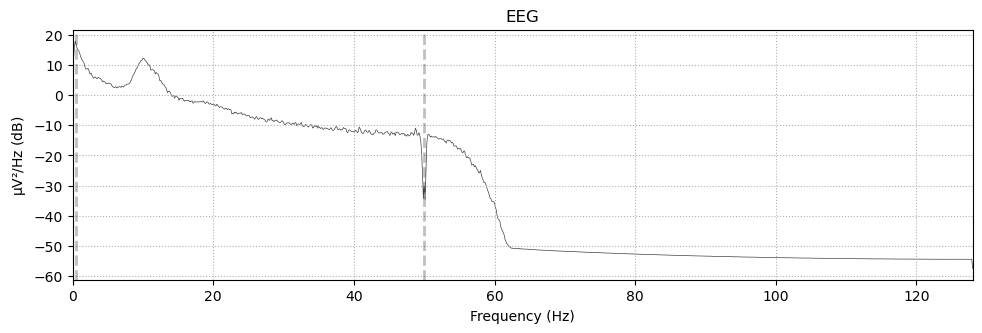

In [8]:
n_psd.plot(picks = ['FC3'])


In [32]:
raw.plot()
n_raw.plot()

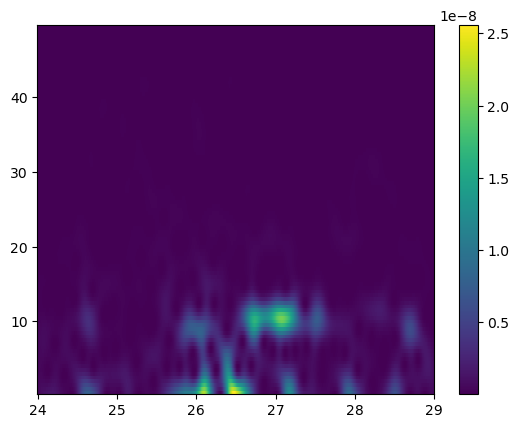

In [37]:
view_length = 5
view_start = 24
view_chan = ['FC3', 'FC5']
view_data = n_raw.get_data(picks=view_chan, tmin=view_start, tmax=view_start+view_length)
# epoch = mne.Epochs(n_raw, event=None, tmin=view_start, tmax=view_start+view_length)
epoch = np.expand_dims(view_data, 1)
freqs_1 = np.arange(0.5, 50.0, 0.5)
test_morlet_1 = mne.time_frequency.tfr_array_morlet(epoch, 256, freqs_1, freqs_1/2, output = 'power')
X_1, Y_1 = np.meshgrid(np.linspace(view_start, view_start+view_length, view_data.shape[1]), freqs_1)
plt.pcolormesh(X_1, Y_1, test_morlet_1[0, 0])
plt.colorbar()
plt.show()
